In [1]:
import midi
import numpy as np
import matplotlib.pyplot as plt
import re
import math


%matplotlib inline 

In [2]:
pattern = midi.read_midifile("amazing_grace.mid")
data_string = str(pattern)
A = data_string.splitlines()
print(type(data_string))
print(len(A))

<class 'str'>
306


In [3]:
num_arr = []

for N in range(len(A)):
    #print(A[N].find('NoteOnEvent'))
    if(A[N].find('resolution') != -1):
        print(A[N])
        
        resolution = [int(i) for i in re.findall(r'\d+', A[N])][1]
        print(resolution)
    
    if(A[N].find('NoteOnEvent') != -1 or A[N].find('NoteOffEvent') != -1):
        #print(A[N])
        #print([int(i) for i in re.findall(r'\d+', A[N])])
        num_arr.append([int(i) for i in re.findall(r'\d+', A[N])])
np_arr = np.array(num_arr)


midi.Pattern(format=1, resolution=960, tracks=\
960


In [4]:

channel = np_arr[:,1]
ch0 = np.where(channel==0)

tick = np_arr[ch0,0][0]
note = np_arr[ch0,2][0]
vel = np_arr[ch0,3][0]

In [5]:
tick

array([   0,    0,  960,    0,    0,    0, 1920,    0,    0,    0,  480,
          0,  480,    0,    0,    0, 1920,    0,    0,    0,  960,    0,
          0,    0, 1920,    0,    0,    0,  960,    0,    0,    0, 1920,
          0,    0,    0,  960,    0,    0,    0, 1920,    0,    0,    0,
        480,    0,  480,    0,    0,    0, 1920,    0,    0,    0,  960,
          0,    0,    0, 2880,    0,    0,    0,  960,    0,    0,    0,
       1440,   26,  357,   71,    0,    0,  480,    0,  480,    0,    0,
          0, 1920,    0,    0,  960,    0,    0, 1440,    0,   53,    0,
        375,    0,    0,    0,  480,    0,  480,    0,    0,    0, 1920,
          0,    0,  960,    0,    0, 1920,    0,    0,    0,  480,    0,
        480,    0,    0,    0, 1920,    0,    0,    0,  960,    0,    0,
          0, 1920,    0])

{0.0,
 0.027083333333333334,
 0.05520833333333333,
 0.07395833333333333,
 0.371875,
 0.390625,
 0.5,
 1.0,
 1.5,
 2.0,
 3.0}

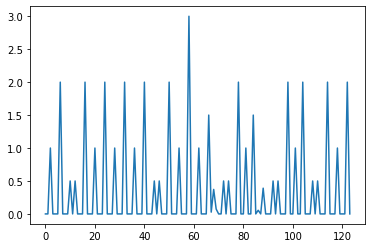

In [6]:
plt.plot(tick/resolution)
set(tick/resolution)

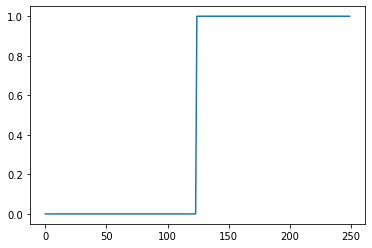

In [7]:
plt.plot(channel)

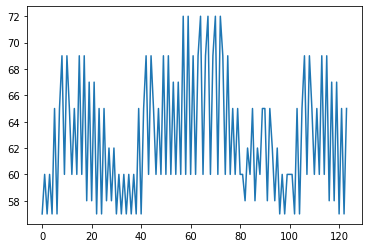

In [8]:
plt.plot(note)

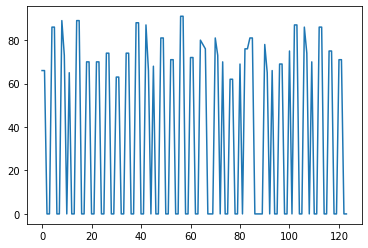

In [9]:
plt.plot(vel)

In [10]:
print(pattern)

midi.Pattern(format=1, resolution=960, tracks=\
[midi.Track(\
  [midi.TimeSignatureEvent(tick=0, data=[3, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[255, 0]),
   midi.TrackNameEvent(tick=0, text='Amazing Grace', data=[65, 109, 97, 122, 105, 110, 103, 32, 71, 114, 97, 99, 101]),
   midi.SetTempoEvent(tick=1920, data=[9, 39, 192]),
   midi.TimeSignatureEvent(tick=18240, data=[4, 2, 24, 8]),
   midi.TimeSignatureEvent(tick=3840, data=[3, 2, 24, 8]),
   midi.TimeSignatureEvent(tick=17280, data=[2, 2, 24, 8]),
   midi.EndOfTrackEvent(tick=1, data=[])]),
 midi.Track(\
  [midi.ProgramChangeEvent(tick=1920, channel=0, data=[0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[121, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[64, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[91, 48]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[10, 51]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[7, 100]),
   midi.TrackNameEvent(tick=0, text='Piano', data=[80

In [11]:
#vel  note  tick

start_tick_arr = []
note_arr = []

current_tick = 0
tick_arr = []
for N in range(len(vel)):

    current_tick += tick[N]
    tick_arr.append(current_tick)
    if(vel[N]!=0):
        start_tick_arr.append(current_tick)
        note_arr.append(note[N])

start_tick_arr = np.array(start_tick_arr)
note_arr = np.array(note_arr)


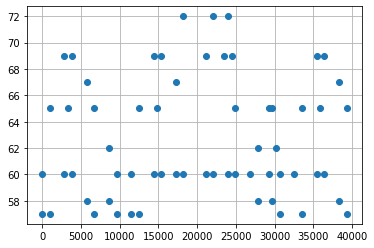

In [12]:
plt.plot(start_tick_arr, note_arr,'o')
plt.grid()

In [13]:
#vel  note  tick

start_tick_arr = []
stop_tick_arr = []
start_note_arr = []
stop_note_arr = []

tick_arr = []

current_tick = 0

for N in range(len(vel)):

    current_tick += tick[N]
    
    tick_arr.append(current_tick)
    
    if(vel[N]!=0):
        start_tick_arr.append(current_tick)
        start_note_arr.append(note[N])
    else:
        stop_tick_arr.append(current_tick)
        stop_note_arr.append(note[N])
        
        
        
start_tick_arr = np.array(start_tick_arr)/resolution
start_note_arr = np.array(start_note_arr)
stop_tick_arr = np.array(stop_tick_arr)/resolution
stop_note_arr = np.array(stop_note_arr)
tick_arr = np.array(tick_arr)/resolution


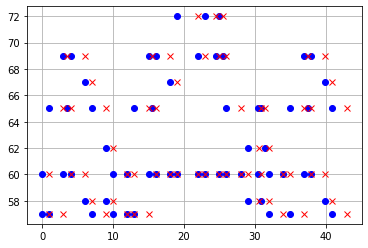

In [14]:
plt.plot(start_tick_arr, start_note_arr,'bo')
plt.plot(stop_tick_arr, stop_note_arr,'rx')
plt.grid()

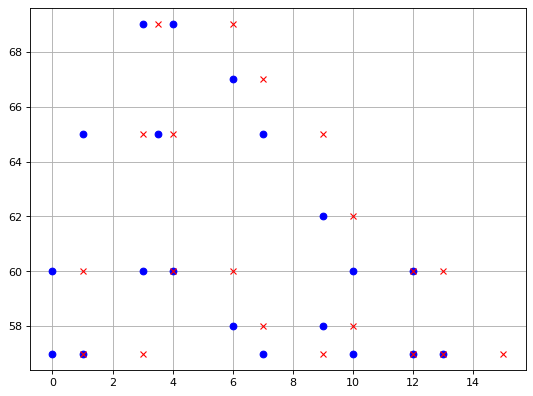

In [15]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(start_tick_arr[:20], start_note_arr[:20],'bo')
plt.plot(stop_tick_arr[:20], stop_note_arr[:20],'rx')
plt.grid()

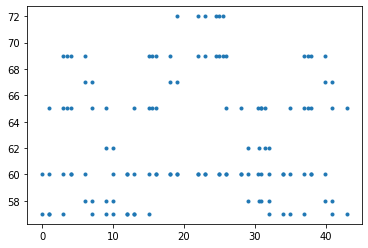

In [16]:
plt.plot(tick_arr, note,'.')

In [17]:
note_grid_arr = np.zeros( (128, math.ceil(tick_arr[-1]) ))
print(note_grid_arr.shape)

(128, 43)


In [18]:
math.ceil(tick_arr[-1])

43

In [19]:
note

array([57, 60, 57, 60, 57, 65, 57, 65, 69, 60, 69, 65, 60, 65, 60, 69, 60,
       69, 58, 67, 58, 67, 57, 65, 57, 65, 58, 62, 58, 62, 57, 60, 57, 60,
       57, 60, 57, 60, 57, 65, 57, 65, 69, 60, 69, 65, 60, 65, 60, 69, 60,
       69, 60, 67, 60, 67, 60, 72, 60, 72, 60, 69, 60, 69, 72, 60, 69, 72,
       60, 69, 72, 60, 72, 69, 60, 69, 60, 65, 60, 65, 60, 60, 58, 62, 60,
       65, 58, 62, 60, 65, 65, 58, 65, 62, 58, 62, 57, 60, 57, 60, 60, 60,
       57, 65, 57, 65, 69, 60, 69, 65, 60, 65, 60, 69, 60, 69, 58, 67, 58,
       67, 57, 65, 57, 65])

In [20]:
note_duration = {}
for note_num in range(128):
    ndx = np.where(note == note_num)
    if len(ndx[0]) > 0:
        if len(ndx[0])%2 != 0:
            print("ERROR!!!!!!!!!!!!!!!!!")
        note_duration[note_num] = tick_arr[ndx]
        print('{}: {}'.format(note_num, note_duration[note_num]))

57: [ 0.       1.       1.       3.       7.       9.      10.      12.
 12.      13.      13.      15.      31.91875 33.91875 34.91875 36.91875
 40.91875 42.91875]
58: [ 6.          7.          9.         10.         28.97291667 30.528125
 30.91875    31.91875    39.91875    40.91875   ]
60: [ 0.          1.          3.          4.          4.          6.
 10.         12.         12.         13.         15.         16.
 16.         18.         18.         19.         19.         22.
 22.         23.         23.         24.89895833 24.97291667 25.97291667
 25.97291667 27.97291667 27.97291667 28.97291667 30.47291667 30.91875
 31.91875    33.91875    33.91875    34.91875    36.91875    37.91875
 37.91875    39.91875   ]
62: [ 9.         10.         28.97291667 30.528125   31.41875    31.91875   ]
65: [ 1.          3.          3.5         4.          7.          9.
 13.         15.         15.5        16.         25.97291667 27.97291667
 30.47291667 30.91875    30.91875    31.41875    34.

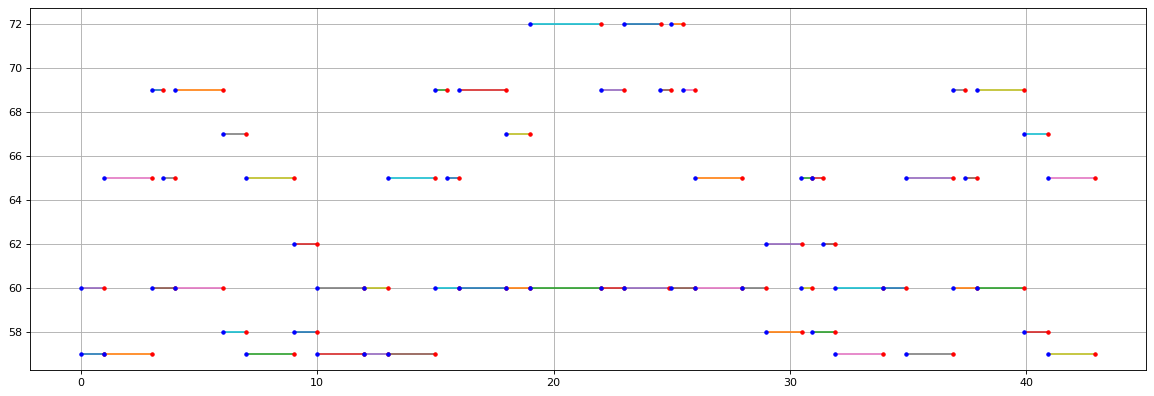

In [21]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.grid()
for key_note in note_duration.keys():
    key_duration = note_duration[key_note]
    for idx in range(0, len(key_duration), 2):
        plt.plot([key_duration[idx], key_duration[idx+1] ],[key_note, key_note])
        plt.plot(key_duration[idx] ,key_note,'b.')
        plt.plot(key_duration[idx+1] ,key_note,'r.')
 